In [1]:
# ************************************************************************* ----
# Params ----
# ************************************************************************* ----

library(ggplot2)

In [2]:
# ************************************************************************* ----
# Load data ----
# ************************************************************************* ----

# read data
emission_df = read.csv(file='../outputs/results/merged_emission_factors.csv')

# head
head(emission_df, n = 5)

,scenario,season,variable,value
,<chr>,<chr>,<chr>,<dbl>
1,BAU,Jan-Apr,sox,1.008
2,BAU,Jan-Apr,sox,0.930
3,BAU,Jan-Apr,sox,0.792
4,BAU,Jan-Apr,sox,0.681
5,BAU,May-Sep,sox,0.865


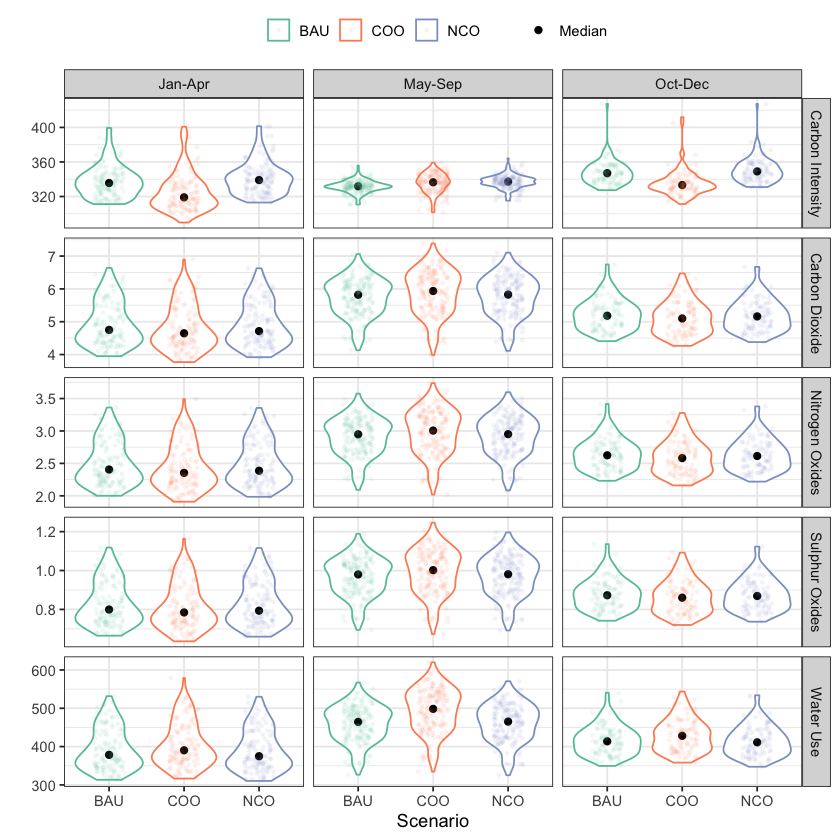

In [3]:
label_names <- c(`sox` = "Sulphur Oxides",
                 `nox` = "Nitrogen Oxides",
                 `water_use` = "Water Use",
                 `carbon_intensity` = "Carbon Intensity",
                 `co2` = "Carbon Dioxide",
                 `Jan-Apr` = "Jan-Apr",
                 `May-Sep` = "May-Sep",
                 `Oct-Dec` = "Oct-Dec"
                )

p <- ggplot(emission_df, 
            aes(x=scenario, 
                y=value, 
                color=scenario),
    ) + 
    geom_violin(
    ) + 
    # geom_boxplot(width=0.1
    # ) + 
    stat_summary(fun=median,
                 aes(shape="Median"),
                 geom="point", 
                 size=2, 
                 color="black",
    ) +
    facet_grid(variable ~ season,
               #ncol=3,
               scales="free_y",
               #strip.position = "right",
               #labeller = as_labeller(c(A = "Currents (A)", V = "Voltage (V)")),
               labeller = as_labeller(label_names),
    ) +
    labs(y='', 
         x='Scenario',
         color='', 
         shape='',
    ) + 
    theme_bw(
    ) + 
    scale_color_brewer(palette="Set2"
    ) + 
    geom_jitter(shape=16, 
                position=position_jitter(0.2),
                alpha=0.1,
                size=1,
    ) +
    theme(#panel.grid.major = element_blank(),
          #panel.grid.minor = element_blank(),
          #axis.text.x =      element_text(angle = 45, vjust = 1, hjust=1),
          #axis.ticks.x =     element_blank(),
          legend.position="top",
          legend.key.size = unit(0.5, "cm"),)

p 

# save figure
ggsave("../outputs/figures/oms_emission_factors_r.png", 
       width = 18, 
       height = 18, 
       units = "cm")